# Exercises from Linear Algebra for DS

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy
import pandas as pd

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)

In [38]:
#function to create nd vectors in (0, 10, 0, 10)
def vec(dim=2):
    return np.random.rand(dim)*10

# function to create row-vectors
def row(dim=2):
    return np.array([vec(dim)])

## Chapter 6

### Exercise 6.1

Calculate frobenius norm

In [3]:
def frobenius_norm(A):
    return np.sum(A**2)**0.5

<AxesSubplot:>

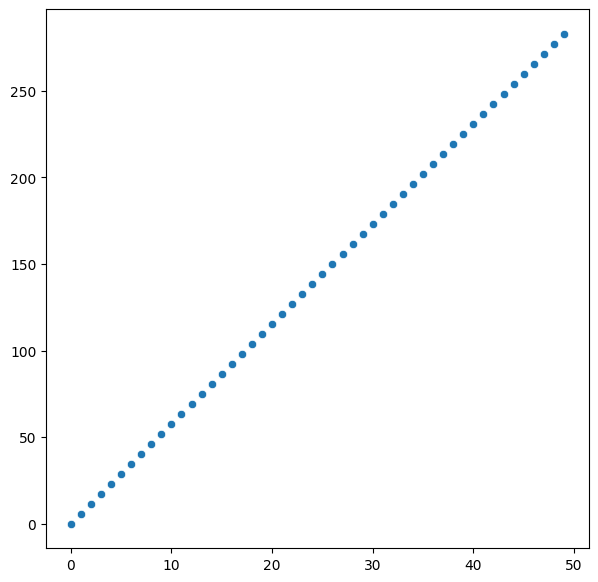

In [6]:
matrix = []

for x in np.arange(10):
    A = np.random.rand(10,10)
    matrix.append([frobenius_norm(A*x) for x in np.arange(50)])

mean_norms = np.mean(matrix, axis=0)

sns.scatterplot(x=np.arange(50), y=mean_norms)

# I think I might be misunderstanding the exercise, because I have completely different picture

### Exercise 6.2

frobenius distance

In [3]:
def frobenius_distance(X, Y):
    return frobenius_norm(X-Y)

Frobenius distance between X,Y is 0.6289230846648184, number of iterations is 6


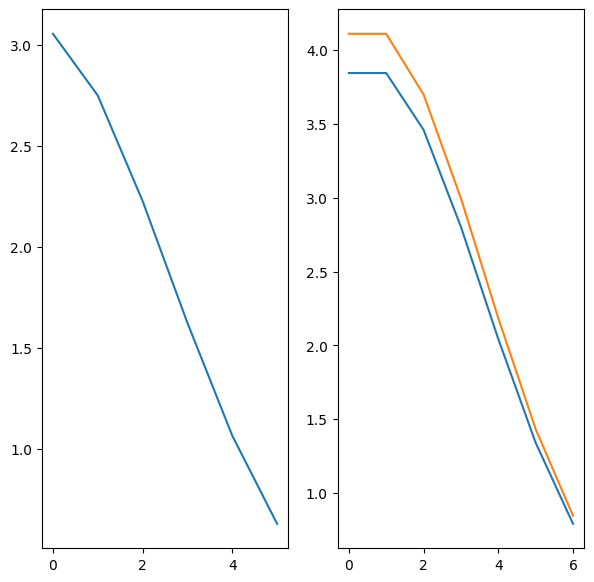

In [8]:
X = np.random.rand(7,7)
Y = np.random.rand(7,7)

xfn = [frobenius_norm(X)]
yfn = [frobenius_norm(Y)]

fd = []

s = 1

while frobenius_distance(X,Y) > 1:
    X = X * s
    Y = Y * s
    
    s *= 0.9
    
    xfn.append(frobenius_norm(X))
    yfn.append(frobenius_norm(Y))
    
    fd.append(frobenius_distance(X,Y))
    
print(f'Frobenius distance between X,Y is {frobenius_distance(X,Y)}, number of iterations is {round(math.log(s, 0.9))}')

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(fd)

ax2.plot(xfn)
ax2.plot(yfn)

### Exercise 6.3

Trace of matrix

In [9]:
A = np.round(np.random.rand(10,10)*10)

In [10]:
frobenius_norm(A) == np.trace(A.T @ A)**0.5 # > True

True

In [11]:
frobenius_norm(A) == np.trace(A @ A.T)**0.5 # > True

True

### Exercise 6.4

In [15]:
A = np.random.rand(10,10)
n = frobenius_norm(A)

In [16]:
I = np.eye(10)

In [53]:
shifts = [A+n*(x/30)*I for x in range(0,31)]

In [54]:
fns = [frobenius_norm(X) for X in shifts] # frobenius norms

In [55]:
fds = [frobenius_distance(A, X) for X in shifts] # frobenius distances

In [56]:
cc = [np.corrcoef(A.flatten(), X.flatten())[0,1] for X in shifts] # correlation coefficients

In [57]:
data = pd.DataFrame({'shift': list(range(0,31)), 'frob_norm': fns, 'frob_distance': fds, 'corr_coef': cc})
data.head()

,shift,frob_norm,frob_distance,corr_coef
0,0,5.392540,0.000000,1.000000
1,1,5.534588,0.568424,0.981843
2,2,5.729752,1.136847,0.929432
3,3,5.972827,1.705271,0.852824
4,4,6.258232,2.273695,0.765657


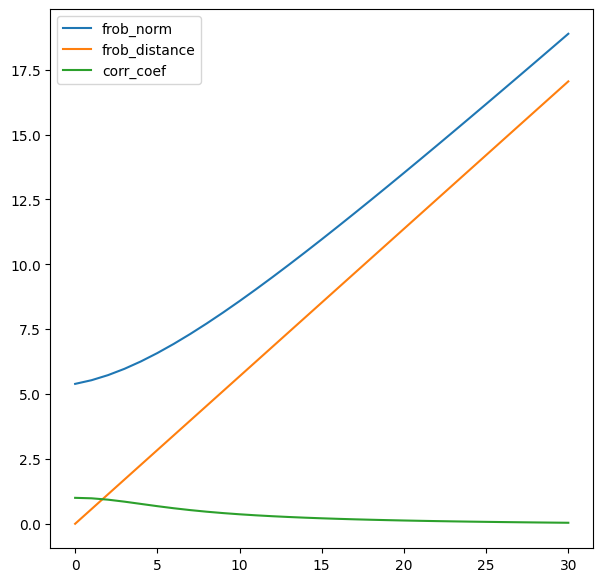

In [69]:
plt.plot(data.frob_norm, label='frob_norm')
plt.plot(data.frob_distance, label='frob_distance')
plt.plot(data.corr_coef, label='corr_coef')

plt.legend(loc="upper left")

### Exercise 6.5

In [3]:
A = np.random.rand(4, 3)
B = np.random.rand(3, 5)

A @ B

array([[0.77025521, 1.05602538, 0.4910928 , 0.62086368, 0.58537665],
       [0.72755171, 0.51403791, 0.54007176, 0.56581151, 0.26661217],
       [0.94061566, 1.11512985, 0.45251259, 0.73151561, 0.65788365],
       [0.67165287, 0.31721184, 0.33191534, 0.49455881, 0.20375811]])

In [4]:
np.linalg.matrix_rank(A @ B) # > 3

3

The result of the previous exerise seems to be true, but why? The reason behind rank of dot of Mxr matrix and rxM matrix being  not larger than r is obvious (due to matrix multiplication rank inequality), but why is it not lesser than r?

Well, to illustrate that we may use determinants. As we know, rank of the matrix equals to the highest order of the non-zero minor of matrix:

$$ rank A = order M_{ii} \mid det(M_{ii})\neq0$$

In case of random matrices we are free to assume that they would have rank not lesser than minimum of dimension shapes; let us then consider the matrix A_r (upper square matrix of A, first r rows) and B_r (left square matrix of B, left r columns). The determinant of A_r and B_r would not equal to zero due to their random nature. 

Let us then consider matrix AxB. The upper-left minor of matrix AxB with size r would be *exactly* A_r x B_r (first r rows of matrix A multiplied on first r columns of matrix B). Due to the fact that

$$ det (X \cdot Y) = det X \cdot det Y $$

And since we already know that

$$ det A_r \neq 0$$
$$ det B_r \neq 0$$

We see that 

$$ M_{r,r} = det (AB_r) = det A_r \cdot det B_r \neq 0 $$

Where M_{r,r} is the upper-left minor of AB sized r, which means that rank of AB is not lesser than r

Hence we see that:

$$ order M_{r,r} = r \le rank (A \cdot B) \le min (rank A, rank B) = r => rank(A \cdot B)=r $$


In [27]:
# But let's also check that!

A = np.random.rand(4, 3)*10 # multiplying on 10 for numbers to be more salient
B = np.random.rand(3, 5)*10

C = A @ B

In [28]:
C

array([[ 41.63410046, 100.24227707, 119.16682122,  54.08097759,
         57.99364648],
       [ 78.81680126, 177.70236962, 144.34773524,  80.68032202,
        128.79749056],
       [ 58.455767  , 129.36308662, 123.85132877,  67.88383621,
         93.14409478],
       [ 68.05838332, 145.59067353, 116.18714219,  72.17856514,
        115.2705848 ]])

In [29]:
np.linalg.matrix_rank(C)

3

In [30]:
det_3 = [[np.linalg.det(C[i:i+3,j:j+3]) for j in range(3)] for i in range(2)]
det_3
# in this case all 3-sized minors are not equal to 0

[[-16664.327361347885, -32786.33293372449, -22042.78606116183],
 [12019.2196049163, 23647.287227707293, 15898.456663051516]]

<AxesSubplot:>

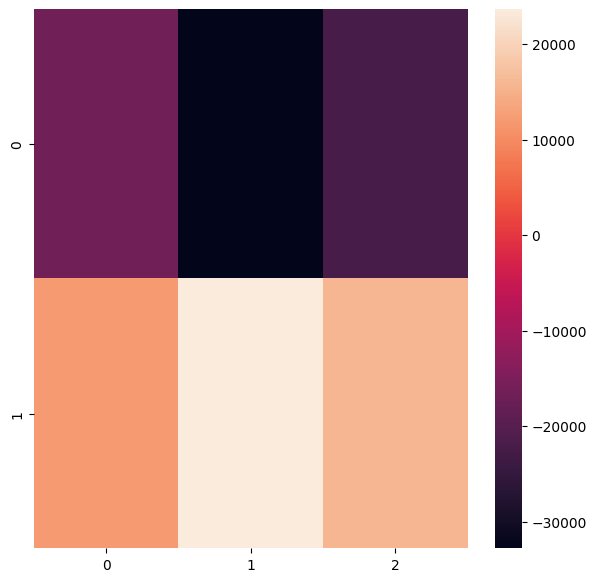

In [34]:
sns.heatmap(det_3)

In [33]:
det_4 = [[np.linalg.det(C[i:i+4,j:j+4]) for j in range(2)] for i in range(1)]
det_4
# and 4-sized minors are equl to 0 (well, close enough to zero)

[[-3.1723758105561327e-10, 0.0]]

### Exercise 6.6

In [42]:
a = vec(3)
#A = np.array([a, 2*a, 3*a])
A = np.array([a, 2*a, vec(3)])

B = np.zeros(3)
c = vec(3)
C = np.array([c, 2*c, 3*c])
d = vec(3)
D = np.array([d, 2*d, vec(3)])

In [43]:
np.linalg.matrix_rank(A),np.linalg.matrix_rank(A+B),np.linalg.matrix_rank(A+C),np.linalg.matrix_rank(A+D),

(2, 2, 2, 2)

In [44]:
np.linalg.matrix_rank(A),np.linalg.matrix_rank(A@B),np.linalg.matrix_rank(A@C),np.linalg.matrix_rank(A@D),

(2, 0, 1, 2)

### Exercise 6.7

In [4]:
def create_ranked(size, rank):
    A = np.random.rand(size, rank)
    B = np.random.rand(rank, size)
    return A @ B

In [10]:
A = create_ranked(8,4)

In [11]:
np.linalg.matrix_rank(A)

4

In [20]:
rk_sums = [[np.linalg.matrix_rank(A+create_ranked(20, i)) for i in np.arange(2,15)] for A in [create_ranked(20, j) for j in np.arange(2,15)]]

<AxesSubplot:>

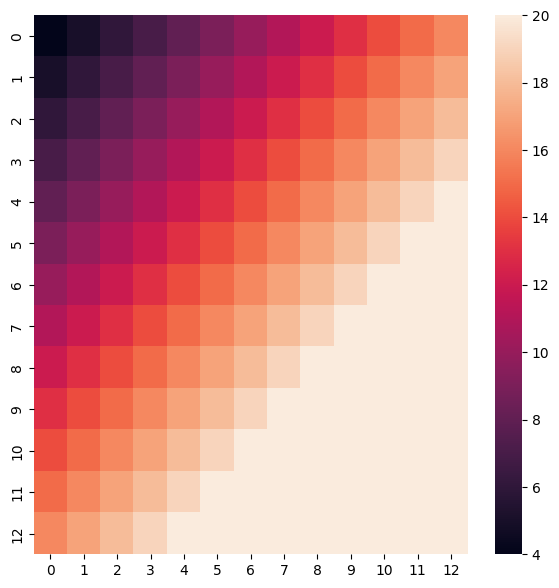

In [21]:
sns.heatmap(rk_sums)

In [15]:
rk_mult = [[np.linalg.matrix_rank(A @ create_ranked(20, i)) for i in np.arange(2,15)] for A in [create_ranked(20, j) for j in np.arange(2,15)]]

<AxesSubplot:>

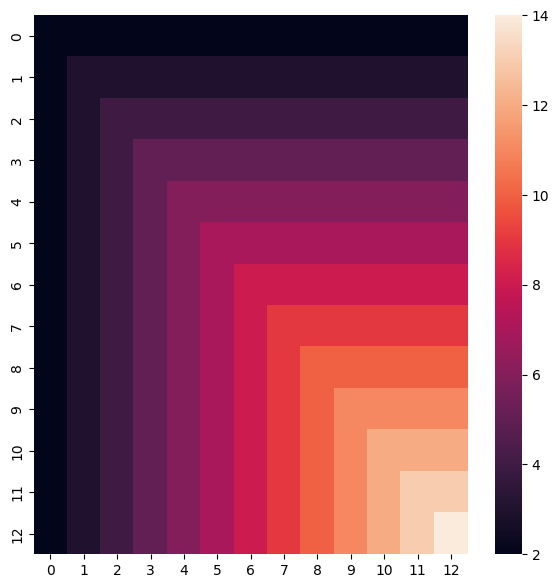

In [17]:
sns.heatmap(rk_mult)

### Exercise 6.8

Prove and/or illustrate that matrices 

$$ A, A^T, A^TA, AA^T $$

have the same rank

Analytical proof for
$$ rank A = rank A^T $$
is simple if we know that column-rank is equal to row-rank (we **do** know that but we **won't** prove it here since it's a basic linalg theorem). Since we know that row-rank A and column-rank A are equal, hence column-rank A equals row-rank A^T

Other stuff is trickier, I'll have to get back to it later

In [25]:
for i in np.arange(1, 20):
    A = create_ranked(20, i)
    print(f'A-rank is {np.linalg.matrix_rank(A)}, At rank is {np.linalg.matrix_rank(A.T)}, AtA rank is {np.linalg.matrix_rank(A.T @ A)}, AAt rank is {np.linalg.matrix_rank(A @ A.T)}')

A-rank is 1, At rank is 1, AtA rank is 1, AAt rank is 1
A-rank is 2, At rank is 2, AtA rank is 2, AAt rank is 2
A-rank is 3, At rank is 3, AtA rank is 3, AAt rank is 3
A-rank is 4, At rank is 4, AtA rank is 4, AAt rank is 4
A-rank is 5, At rank is 5, AtA rank is 5, AAt rank is 5
A-rank is 6, At rank is 6, AtA rank is 6, AAt rank is 6
A-rank is 7, At rank is 7, AtA rank is 7, AAt rank is 7
A-rank is 8, At rank is 8, AtA rank is 8, AAt rank is 8
A-rank is 9, At rank is 9, AtA rank is 9, AAt rank is 9
A-rank is 10, At rank is 10, AtA rank is 10, AAt rank is 10
A-rank is 11, At rank is 11, AtA rank is 11, AAt rank is 11
A-rank is 12, At rank is 12, AtA rank is 12, AAt rank is 12
A-rank is 13, At rank is 13, AtA rank is 13, AAt rank is 13
A-rank is 14, At rank is 14, AtA rank is 14, AAt rank is 14
A-rank is 15, At rank is 15, AtA rank is 15, AAt rank is 15
A-rank is 16, At rank is 16, AtA rank is 16, AAt rank is 16
A-rank is 17, At rank is 17, AtA rank is 17, AAt rank is 17
A-rank is 18, At

### Exercise 6.9

In [60]:
def belongs_to_space(L, v):
    return np.linalg.matrix_rank(L) == np.linalg.matrix_rank(np.concatenate((L, v), axis=1))

In [61]:
A = np.round(np.random.rand(4, 3)*10)
x = np.round(row(4).T)

In [62]:
A

array([[7., 2., 5.],
       [2., 6., 8.],
       [6., 0., 9.],
       [1., 3., 8.]])

In [63]:
x

array([[ 0.],
       [ 8.],
       [ 6.],
       [10.]])

In [64]:
np.concatenate((A, x), axis=1)

array([[ 7.,  2.,  5.,  0.],
       [ 2.,  6.,  8.,  8.],
       [ 6.,  0.,  9.,  6.],
       [ 1.,  3.,  8., 10.]])

In [72]:
belongs_to_space(A, A[:, 1].reshape(-1,1))

True

In [73]:
# Pretty neat

In [74]:
# Now let's look at 4d case:

In [77]:
L = np.random.rand(4,4)
v = row(4).T

In [79]:
belongs_to_space(L,v) # > True

# That would be however always true due to the fact that in full-ranked matrix coluumns would be basis 
# for all of the vectors in that space
# so it stands to reason that any vector of the same dimensions would belong to the said linear space

True

### Exercise 6.10

In [81]:
# I might do it later, but I'd rather skip it for now